In [12]:
# add dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from scipy.stats import linregress

In [13]:
#Questions to Answer
# Are Sales Increasing? 
# What products are selling the most? 
# What products are selling the least? 
# Do Higher Discounts result in more products sold? Total Net Sales? 
# What products are increasing the most in demand? 

In [14]:
# write paths to files
sales_path = os.path.join("Resources","business.retailsales.csv")
monthly_sales_path = os.path.join("Resources","business.retailsales2.csv")

# read files to pandas dataframes
sales_df = pd.read_csv(sales_path)
monthly_sales_df = pd.read_csv(monthly_sales_path)

In [15]:
sales_df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [16]:
# 8 products with null values
sales_df.isnull().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [17]:
# sales with nulls makes up less than 1% of sales, so we can drop these rows
num_null = sales_df.isnull().sum().tolist()[0]
percent_null = num_null / len(sales_df) * 100
percent_null

0.4507042253521127

In [18]:
# drop rows with null values, now the dataframe is clean
sales_df = sales_df.dropna()
sales_df.isnull().sum()

Product Type       0
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [19]:
# group orders by the product type 
sum_by_product = sales_df.groupby('Product Type').sum()

In [20]:
product_list = sum_by_product.index.tolist()
sum_products_sold = sum_by_product['Net Quantity']

Text(0, 0.5, 'Quantity Sold')

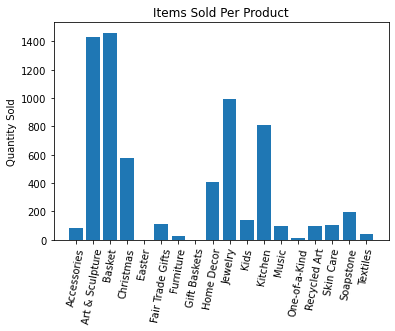

In [21]:
# plot total number of items sold for each product
# most ordered products are Art/Sculpture, Basket, and jewelry
plt.bar(product_list, sum_products_sold)
plt.xticks(rotation = 80)
plt.title("Items Sold Per Product")
plt.ylabel("Quantity Sold")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

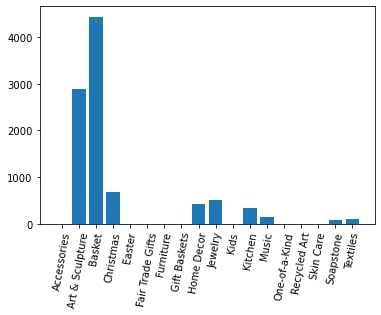

In [22]:
# most of the money lost by returns is from baskets and Art/Sculptures
returns_by_product = sum_by_product['Returns'] * -1
plt.bar(product_list, returns_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Returns ($)")
plt.title("Returns From Each Product")

Text(0.5, 1.0, 'Total Discounts Per Product Type')

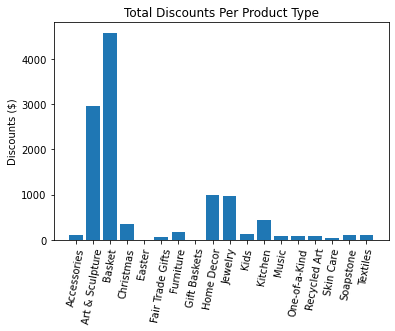

In [26]:
# most of the money from discounts is from baskets and Art/Sculpture
discount_by_product = sum_by_product['Discounts'] * -1
plt.bar(product_list, discount_by_product)
plt.xticks(rotation = 80)
plt.ylabel("Discounts ($)")
plt.title("Total Discounts Per Product Type")

In [27]:
# inspect the second data frame
# we are given monthy sales, but do not know details about the products sold
monthly_sales_df.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [28]:
# data is clean
monthly_sales_df.isnull().sum()

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [29]:
# create new column that combines month and year
monthly_sales_df['Month-Year'] = monthly_sales_df['Month'] + ' ' + monthly_sales_df['Year'].astype(str)
monthly_sales_df['Month-Year'] 

0       January 2017
1      February 2017
2         March 2017
3         April 2017
4           May 2017
5          June 2017
6          July 2017
7        August 2017
8     September 2017
9       October 2017
10     November 2017
11     December 2017
12      January 2018
13     February 2018
14        March 2018
15        April 2018
16          May 2018
17         June 2018
18         July 2018
19       August 2018
20    September 2018
21      October 2018
22     November 2018
23     December 2018
24      January 2019
25     February 2019
26        March 2019
27        April 2019
28          May 2019
29         June 2019
30         July 2019
31       August 2019
32    September 2019
33      October 2019
34     November 2019
35     December 2019
Name: Month-Year, dtype: object

In [30]:
# demonstration of converting string to datetime object
s = monthly_sales_df['Month-Year'][0]
_format = "%B %Y"
date = datetime.strptime(s,_format) 
print(date)

2017-01-01 00:00:00


In [31]:
# use the apply function to convert each Month-Year to an actual date
monty_year_series = monthly_sales_df['Month-Year'].apply(lambda x: datetime.strptime(x,_format))
monthly_sales_df['Month-Year'] = monty_year_series
monthly_sales_df['Month-Year'].head()

0   2017-01-01
1   2017-02-01
2   2017-03-01
3   2017-04-01
4   2017-05-01
Name: Month-Year, dtype: datetime64[ns]

In [32]:
# Check type of Month-Year column - it is in fact a datetime object now
monthly_sales_df.dtypes

Month                   object
Year                     int64
Total Orders             int64
Gross Sales            float64
Discounts              float64
Returns                float64
Net Sales              float64
Shipping               float64
Total Sales            float64
Month-Year      datetime64[ns]
dtype: object

In [33]:
monthly_sales_df['Net Loss'] = 100 - (monthly_sales_df['Total Sales'] / ((monthly_sales_df['Total Sales'] - monthly_sales_df['Discounts'] - monthly_sales_df['Returns'])) * 100)
monthly_sales_df['Net Loss'] = monthly_sales_df['Net Loss'].apply(lambda x: round(x, 0))

(array([17167., 17287., 17410., 17532., 17652., 17775., 17897., 18017.,
        18140., 18262.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

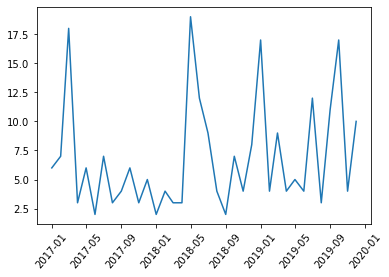

In [34]:
plt.plot(monthly_sales_df['Month-Year'],monthly_sales_df['Net Loss'])
plt.xticks(rotation = 50)
plt.ylabel("Loss (%)")
plt.title("Monthly Net Loss (2017-2019)")

Text(0.5, 1.0, 'Monthly Total Sales (2017-2019)')

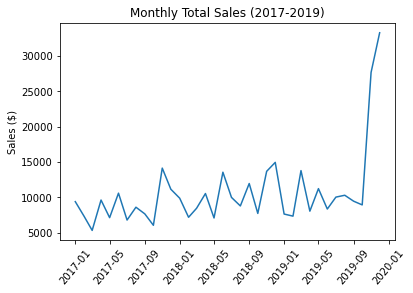

In [37]:
plt.plot(monthly_sales_df['Month-Year'], monthly_sales_df['Total Sales'])
plt.xticks(rotation = 50)
plt.ylabel("Sales ($)")
plt.title("Monthly Total Sales (2017-2019)")

In [38]:
monthly_sales_df.groupby('Year').sum()

,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Net Loss
Year,,,,,,,,
2017,836,97342.05,-1849.15,-3972.40,91520.50,11976.77,103497.27,70.0
2018,1141,113313.15,-3112.39,-5412.58,104788.18,18780.10,123568.28,77.0
2019,1520,143762.15,-6252.24,-7713.51,129796.40,26101.23,155900.33,100.0


In [39]:
years = monthly_sales_df.groupby('Year').sum().index.tolist()
years

[2017, 2018, 2019]

In [40]:
tot_annual_sales = monthly_sales_df.groupby('Year').sum()['Total Sales'].values.tolist()
tot_annual_sales

[103497.27, 123568.28, 155900.33000000002]

Text(0, 0.5, 'Sales ($)')

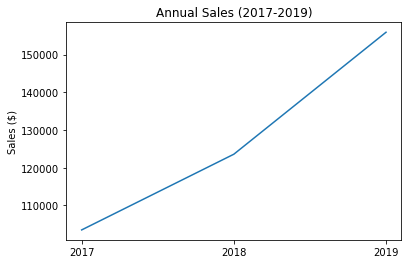

In [43]:
plt.plot(years, tot_annual_sales)
plt.xticks(ticks = years)
plt.title("Annual Sales (2017-2019)")
plt.ylabel("Sales ($)")

Text(0, 0.5, 'Sales ($)')

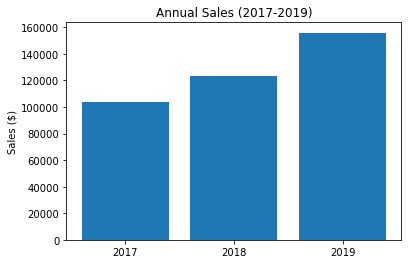

In [45]:
plt.bar(years, tot_annual_sales)
plt.xticks(ticks=years)
plt.title("Annual Sales (2017-2019)")
plt.ylabel("Sales ($)")

In [46]:
year_2017 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2017]
year_2018 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2018]
year_2019 = monthly_sales_df.loc[monthly_sales_df['Year'] == 2019]

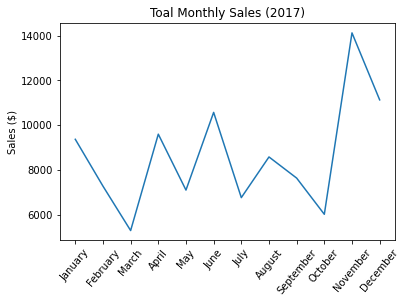

In [50]:
# Each Year, Total Sales Skyrocket From October to December, likely because of Christmas season
plt.plot(year_2017['Month'], year_2017['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2017)")
plt.show()

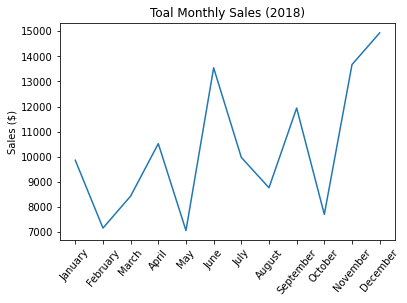

In [52]:
plt.plot(year_2018['Month'], year_2018['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2018)")
plt.show()

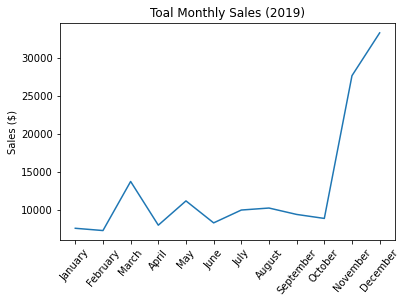

In [53]:
plt.plot(year_2019['Month'], year_2019['Total Sales'])
plt.xticks(rotation=50)
plt.ylabel("Sales ($)")
plt.title("Toal Monthly Sales (2019)")
plt.show()

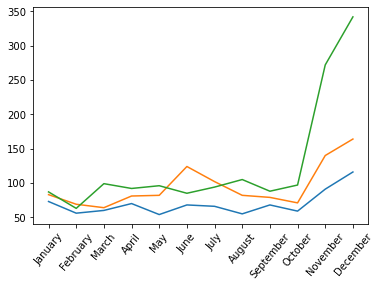

In [54]:
plt.plot(year_2017['Month'], year_2017['Total Orders'])
plt.plot(year_2018['Month'], year_2018['Total Orders'])
plt.plot(year_2019['Month'], year_2019['Total Orders'])
plt.xticks(rotation=50)
plt.show()

In [55]:
monthly_sales_df.groupby('Month').mean()

,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales,Net Loss
Month,,,,,,,,,
April,2018.0,81.000000,8399.116667,-266.360000,-16.666667,8116.090000,1266.103333,9382.193333,3.333333
August,2018.0,80.666667,8187.733333,-200.380000,-102.573333,7884.780000,1324.080000,9208.860000,3.333333
December,2018.0,207.333333,18407.816667,-930.186667,-884.576667,16593.053333,3198.766667,19791.820000,7.666667
February,2018.0,62.666667,6653.800000,-184.916667,-191.016667,6277.866667,974.403333,7252.270000,5.000000
January,2018.0,81.000000,8532.083333,-202.823333,-575.016667,7754.243333,1194.086667,8949.230000,8.333333
July,2018.0,87.333333,8498.050000,-245.480000,-689.310000,7563.260000,1355.263333,8918.523333,9.333333
June,2018.0,92.333333,10068.016667,-251.956667,-563.143333,9252.916667,1561.870000,10814.786667,6.000000
March,2018.0,74.333333,8765.566667,-279.623333,-669.000000,7816.943333,1349.816667,9166.760000,10.000000
May,2018.0,77.333333,8084.383333,-289.300000,-625.056667,7170.026667,1289.870000,8459.896667,10.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

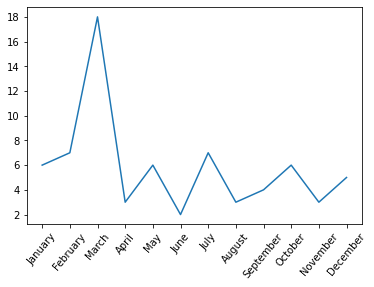

In [56]:
plt.plot(year_2017['Month'],monthly_sales_df['Net Loss'][0:12])
plt.xticks(rotation = 50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

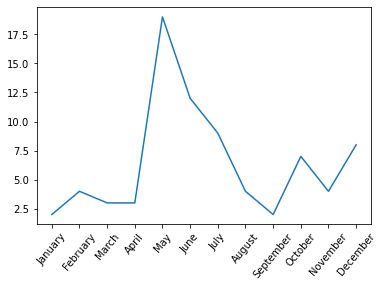

In [57]:
plt.plot(year_2018['Month'],monthly_sales_df['Net Loss'][12:24])
plt.xticks(rotation = 50)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

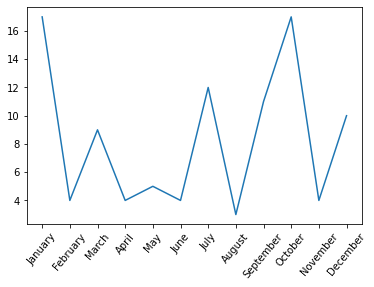

In [58]:
plt.plot(year_2019['Month'],monthly_sales_df['Net Loss'][24:36])
plt.xticks(rotation = 50)

r value: 0.4681075137829214
p_value: 0.003987827522090937


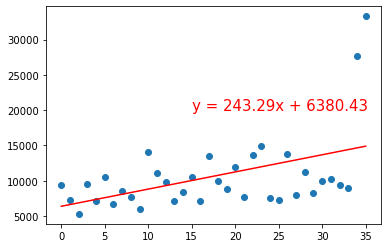

In [59]:
(slope, intercept, r_value, p_value, std_err) = linregress(monthly_sales_df['Month-Year'].index.tolist(), monthly_sales_df['Total Sales'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in monthly_sales_df['Month-Year'].index.tolist()]
plt.scatter(monthly_sales_df['Month-Year'].index, monthly_sales_df['Total Sales'])
plt.plot(monthly_sales_df['Month-Year'].index.tolist(),regress_values,"r")
plt.annotate(line_eq, (15, 20000), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.1832351861409427
p_value: 0.28475425963814965


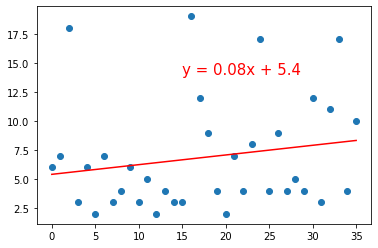

In [60]:
(slope, intercept, r_value, p_value, std_err) = linregress(monthly_sales_df['Month-Year'].index.tolist(), monthly_sales_df['Net Loss'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in monthly_sales_df['Month-Year'].index.tolist()]
plt.scatter(monthly_sales_df['Month-Year'].index, monthly_sales_df['Net Loss'])
plt.plot(monthly_sales_df['Month-Year'].index.tolist(),regress_values,"r")
plt.annotate(line_eq, (15, 14), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.31834087431602653
p_value: 6.622506603885945e-43


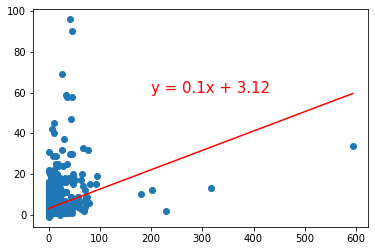

In [61]:
(slope, intercept, r_value, p_value, std_err) = linregress((sales_df['Discounts']*-1).values.tolist(), sales_df['Net Quantity'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in (sales_df['Discounts']*-1).values.tolist()]
plt.scatter((sales_df['Discounts']*-1) ,sales_df['Net Quantity'])
plt.plot((sales_df['Discounts']*-1).values.tolist(),regress_values,"r")
plt.annotate(line_eq, (200, 60), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}")
plt.show()

r value: 0.8387262146933888
p_value: 0.0
r^2: 0.7034616632139006


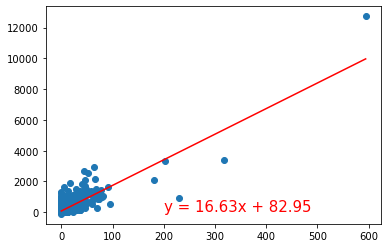

In [62]:
(slope, intercept, r_value, p_value, std_err) = linregress((sales_df['Discounts']*-1).values.tolist(), sales_df['Total Net Sales'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(i * slope + intercept) for i in (sales_df['Discounts']*-1).values.tolist()]
plt.scatter((sales_df['Discounts']*-1) ,sales_df['Total Net Sales'])
plt.plot((sales_df['Discounts']*-1).values.tolist(),regress_values,"r")
plt.annotate(line_eq, (200, 60), fontsize=15, color="red")
print(f"r value: {r_value}\np_value: {p_value}\nr^2: {r_value * r_value}")
plt.show()

In [63]:
sales_df

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [64]:
sales_df[sales_df['Total Net Sales'] < 0]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
1774,Kitchen,-1,0.0,0.0,-106.25,-106.25


In [65]:
sales_per_item = sales_df.groupby('Product Type').sum()['Total Net Sales'] / sales_df.groupby('Product Type').sum()['Net Quantity']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

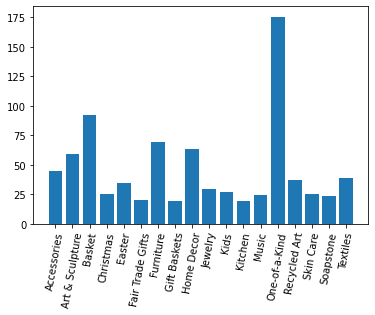

In [66]:
# increase revenue by producing more one-of-a-kind products
plt.bar(sales_per_item.index.tolist(), sales_per_item.values.tolist())
plt.xticks(rotation = 80)

In [67]:
sales_df[]

SyntaxError: invalid syntax (989820826.py, line 1)

In [68]:
total_orders = sum(monthly_sales_df['Total Orders'].values.tolist())
total_orders

3497

In [69]:
total_items_sold = sum(sales_df['Net Quantity'].values.tolist())
total_items_sold

6582

In [70]:
# each order is two items bought on average
avg_order = round(total_items_sold / total_orders, 2)
avg_order

1.88

In [71]:
#Questions to Answer
# Are Sales Increasing? --> Yes
# What products are selling the most? --> Basket, Art & Sculpture, jewelry
# What products are selling the least? --> Easter, Gift Baskets, One-of-a-kind
# Do Higher Discounts result in more products sold? Total Net Sales? --> Yes
# What products are increasing the most in demand? --> cannot determine